# Panan01 Along Slope Anomaly

In [1]:
import intake
from pathlib import Path
import numpy as np
import xarray as xr

import xgcm
import cf_xarray

# For plotting
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cmocean as cm
import pyproj
import cmocean as cm
import cartopy.feature as cft

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 251.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35065,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.19 GiB
Comm: tcp://127.0.0.1:44059,Total threads: 1
Dashboard: /proxy/42701/status,Memory: 8.97 GiB
Nanny: tcp://127.0.0.1:39249,


In [3]:
pancontrol01 = intake.open_esm_datastore('/home/272/kc5856/panantrial/experiment_datastore.json', columns_with_iterables=['variable'])
pantrial01 = intake.open_esm_datastore('/home/272/kc5856/catalog_dir/experiment_datastore.json', columns_with_iterables=['variable'])

In [4]:
uo_C = pancontrol01.search(variable="uo", frequency="1mon").to_dask()
vo_C = pancontrol01.search(variable="vo", frequency="1mon").to_dask()
uo_MW = pantrial01.search(variable="uo", frequency="1mon").to_dask()
vo_MW = pantrial01.search(variable="vo", frequency="1mon").to_dask()

In [5]:
uC = uo_C.uo.sel(yh = slice(-80, -59), z_l = slice(None, 500)).sel(time=slice('2001-01-01','2010-12-31')).mean('time')
vC = vo_C.vo.sel(yq = slice(-80, -59), z_l = slice(None, 500)).sel(time=slice('2001-01-01','2010-12-31')).mean('time')
uMW = uo_MW.uo.sel(yh = slice(-80, -59), z_l = slice(None, 500)).sel(time=slice('2001-01-01','2010-12-31')).mean('time')
vMW = vo_MW.vo.sel(yq = slice(-80, -59), z_l = slice(None, 500)).sel(time=slice('2001-01-01','2010-12-31')).mean('time')

In [6]:
cont_n = xr.merge([uC,vC])
cont_n= cont_n.isel(xq = slice(1, None), yq = slice(1, None))
pert_n = xr.merge([uMW,vMW])
pert_n= pert_n.isel(xq = slice(1, None), yq = slice(1, None))

In [7]:
path_to_ocean_static_MW = Path('/g/data/g40/akm157/model_output/mom6-panan/panant-01-zstar-ssp126-MW-only/output021/20010701.ocean_static.nc')
ocean_static_MW = xr.open_dataset(path_to_ocean_static_MW)

In [8]:
ocean_static_MW = ocean_static_MW.sel(xq = pert_n['xq'], xh = pert_n['xh'], yq = pert_n['yq'], yh = pert_n['yh'])

grid_MW = xgcm.Grid(ocean_static_MW, coords = {'X': {'center': 'xh', 'right': 'xq'},
                                     'Y': {'center': 'yh', 'right': 'yq'}},
                                   periodic = ['X'])

In [9]:
dh_dx_MW = grid_MW.interp(grid_MW.diff(ocean_static_MW['deptho'], 'X') / ocean_static_MW['dxCu'], 'Y')
dh_dy_MW = grid_MW.interp(grid_MW.diff(ocean_static_MW['deptho'], 'Y') / ocean_static_MW['dyCv'], 'X')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [10]:
path_to_ocean_static_C = Path('/g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output021/20000701.ocean_static.nc')
ocean_static_C = xr.open_dataset(path_to_ocean_static_C)

In [11]:
ocean_static_C = ocean_static_C.sel(xq = pert_n['xq'], xh = pert_n['xh'], yq = pert_n['yq'], yh = pert_n['yh'])

grid_C = xgcm.Grid(ocean_static_C, coords = {'X': {'center': 'xh', 'right': 'xq'},
                                     'Y': {'center': 'yh', 'right': 'yq'}},
                                   periodic = ['X'])

In [12]:
dh_dx_C = grid_C.interp(grid_C.diff(ocean_static_C['deptho'], 'X') / ocean_static_C['dxCu'], 'Y')
dh_dy_C = grid_C.interp(grid_C.diff(ocean_static_C['deptho'], 'Y') / ocean_static_C['dyCv'], 'X')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [13]:
uC_int = grid_C.interp(cont_n['uo'], 'Y')
vC_int = grid_C.interp(cont_n['vo'], 'X')
uMW_int = grid_MW.interp(pert_n['uo'], 'Y')
vMW_int = grid_MW.interp(pert_n['vo'], 'X')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return

In [14]:
slope_C = np.sqrt(dh_dy_C**2 + dh_dx_C**2)
slope_MW = np.sqrt(dh_dy_MW**2 + dh_dx_MW**2)

In [15]:
testC = uC_int*dh_dy_C - vC_int*dh_dx_C
testMW = uMW_int*dh_dy_MW - vMW_int*dh_dx_MW

In [16]:
alongslope_velocity_C = testC/slope_C
alongslope_velocity_MW = testMW/slope_MW

In [17]:
alongslope_velocity_C = alongslope_velocity_C.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 27.92 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [18]:
alongslope_velocity_MW = alongslope_velocity_MW.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 28.11 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [19]:
data_fixed_C = pancontrol01.search(variable=["areacello","deptho"],path=".*output021.*").to_dask()
volcello_C = pancontrol01.search(variable=["volcello"],path=".*output021.*",file_id=["XXXXXXXX_ocean_month_z"]).to_dask()
data_fixed_MW = pantrial01.search(variable=["areacello","deptho"],path=".*output021.*").to_dask()
volcello_MW = pantrial01.search(variable=["volcello"],path=".*output021.*",file_id=["XXXXXXXX_ocean_month_z"]).to_dask()

In [20]:
areaC = data_fixed_C.areacello
thicknessC = volcello_C / areaC
thicknessC = thicknessC.sel(yh=slice(-80, -59)).sel(z_l=slice(None, 500))

In [21]:
areaMW = data_fixed_MW.areacello
thicknessMW = volcello_MW / areaMW
thicknessMW = thicknessMW.sel(yh=slice(-80, -59)).sel(z_l=slice(None, 500))

In [28]:
#alongslope_velocity_C = grid_C.interp(alongslope_velocity_C, 'Y')
#alongslope_velocity_C = grid_C.interp(alongslope_velocity_C, 'X')

alongslope_velocity_MW = grid_MW.interp(alongslope_velocity_MW, 'Y')
alongslope_velocity_MW = grid_MW.interp(alongslope_velocity_MW, 'X')
alongslope_velocity_MW

<xarray.DataArray (z_l: 39, yh: 483, xh: 3600)> Size: 271MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.09257884, -0.08490226, -0.06229205, ..., -0.00194512,
         -0.01919289, -0.07341478],
        [-0.08913192, -0.10102309, -0.10329875, ..., -0.00110319,
         -0.05056425, -0.08720826],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.02876762, -0.02523562, -0.02318332, ...,  0.0092304 ,
          0.00165548, -0.02076877],
        [-0.02583747, -0.03344455, -0.03690434, ...,  0.00770418,
         -0.01047892, -0.02417312],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.02733631, -0.02403525, -0.02200025, ...,  0.00842406,
          0.00128143, -0.01978667],
        [-0.0246722 , -0.03182891, -0.03507252, ...,  0.00686902,
         -0.01021664, -0.02307834],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * xh       (xh) float64 29kB -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yh       (yh) float64 4kB -79.97 -79.93 -79.88 ... -59.14 -59.08 -59.03
Dimensions without coordinates: z_l

In [29]:
# Depth average gives us the barotropic velocity
barotropic_alongslope_velocity_C = (alongslope_velocity_C * thicknessC['volcello']).sum('z_l') / thicknessC['volcello'].sum('z_l')
barotropic_alongslope_velocity_MW = (alongslope_velocity_MW * thicknessMW['volcello']).sum('z_l') / thicknessMW['volcello'].sum('z_l')

In [30]:
barotropic_alongslope_velocity_C = barotropic_alongslope_velocity_C.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 258.91 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [31]:
barotropic_alongslope_velocity_MW = barotropic_alongslope_velocity_MW.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 259.27 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [32]:
barotropic_alongslope_velocity_C = barotropic_alongslope_velocity_C.mean('time')
barotropic_alongslope_velocity_MW = barotropic_alongslope_velocity_MW.mean('time')

In [33]:
barotropic_alongslope_velocity_anom = barotropic_alongslope_velocity_MW - barotropic_alongslope_velocity_C

In [34]:
# Plotting

In [35]:
theta  = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.275
verts  = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [36]:
land_50m = cft.NaturalEarthFeature("physical", "land", "50m", edgecolor="black", facecolor="papayawhip", linewidth=0.5)
projection = ccrs.SouthPolarStereo()

In [37]:
def shelf_mask_isobath(var, model_dict):

    paths = {"mom5": "/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz",
             "mom6": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc", 
             }

    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [38]:
depth = data_fixed_C.deptho
land_mask = (depth*0).fillna(1)
depth_shelf, shelf_mask = shelf_mask_isobath(depth, 'mom6')

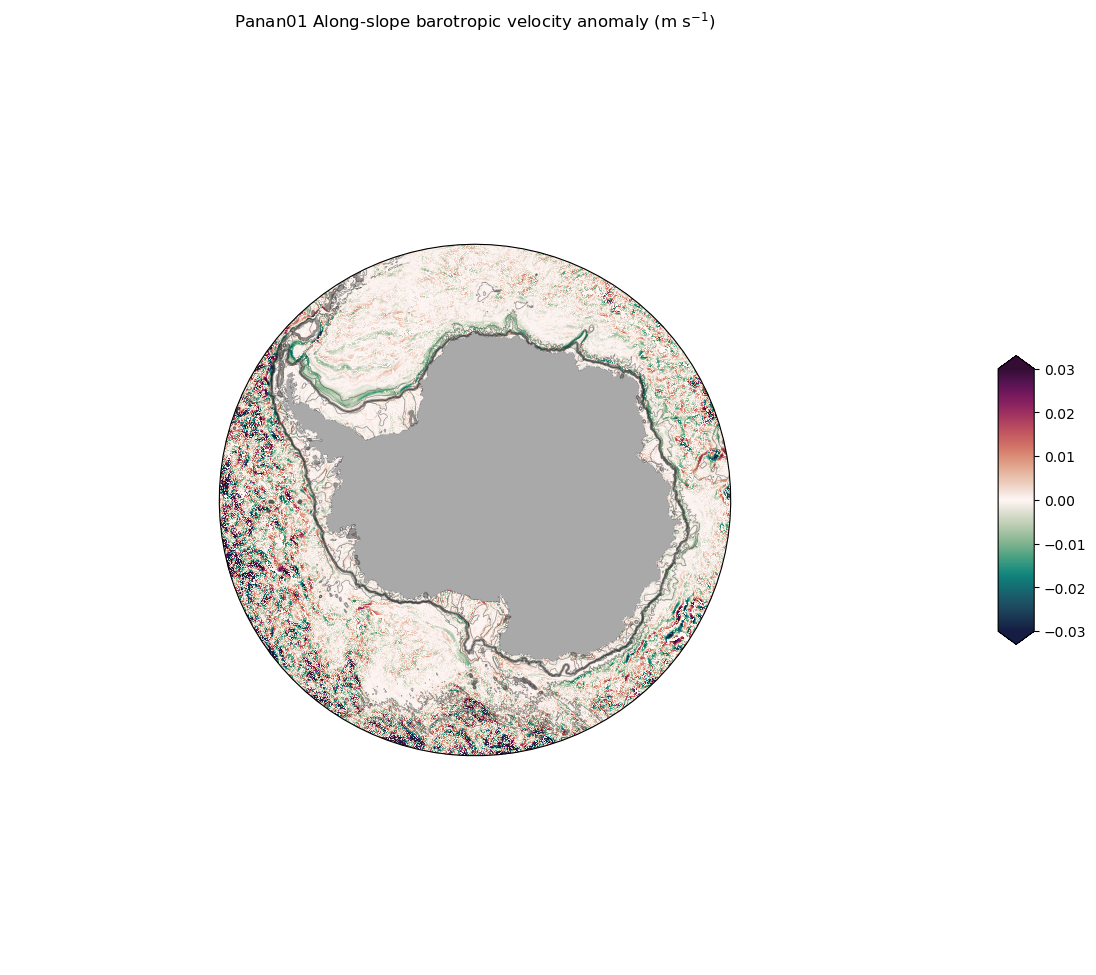

In [42]:
fig = plt.figure(1, figsize=(15, 15))

ax = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax.set_boundary(circle, transform=ax.transAxes)


ax.contour(land_mask.cf['X'], land_mask.cf['Y'], land_mask,
           levels = [0, 1], colors = 'dimgrey',linewidths=0.25, transform = ccrs.PlateCarree())
ax.contour(shelf_mask.cf['X'], shelf_mask.cf['Y'], shelf_mask,
           levels = [0, 1], colors = 'black', linewidths=0.25,transform = ccrs.PlateCarree())

# Depth contours
data_fixed_C.deptho.plot.contour(ax=ax, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# Along slope barotropic velocity
sc = barotropic_alongslope_velocity_anom.plot(ax=ax, cmap=cm.cm.curl,
                                         transform=ccrs.PlateCarree(),
                                         vmin=-0.03, vmax=0.03,
                                         cbar_kwargs={'orientation': 'vertical',
                                                      'shrink': 0.25,
                                                      'extend': 'both',
                                                      'label': None,
                                                      'aspect': 8})
  
ax.set_title('Panan01 Along-slope barotropic velocity anomaly (m s$^{-1}$)');